In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import precision_score, mean_squared_error, roc_auc_score, recall_score, mean_absolute_error

# Classificacão:


## Tratamento da base de dados:

In [269]:
data_classificacao = pd.read_csv('ValeClassificacao.csv')
data_classificacao['Data'] = pd.to_datetime(data_classificacao['Data'])

In [270]:
train_classificacao = data_classificacao[data_classificacao["Data"] < "2021-01-01"]
validacao_classificacao = data_classificacao[(data_classificacao["Data"] >= "2021-01-01") & (data_classificacao["Data"] < "2022-01-01")]
test_classificacao = data_classificacao[data_classificacao["Data"] >= "2022-01-01"]

train_classificacao = train_classificacao.iloc[:, 1:]
validacao_classificacao = validacao_classificacao.iloc[:, 1:]
test_classificacao = test_classificacao.iloc[:, 1:]

In [271]:
x_classificacao_train = train_classificacao.iloc[:, :-1]
y_classificacao_train = train_classificacao.iloc[:, -1]

x_classificacao_validacao = validacao_classificacao.iloc[:, :-1]
y_classificacao_validacao = validacao_classificacao.iloc[:, -1]

x_classificacao_test = test_classificacao.iloc[:, :-1]
y_classificacao_test = test_classificacao.iloc[:, -1]

## Baseline da classificação:

In [272]:
counts = y_classificacao_test.value_counts()

if counts[0] > counts[1]:
    baseline_classificacao = np.zeros(len(y_classificacao_test), dtype=int)
elif counts[1] > counts[0]:
    baseline_classificacao = np.ones(len(y_classificacao_test), dtype=int)

print("Precisão: ", precision_score(y_classificacao_test, baseline_classificacao, average='binary', zero_division=0))
print("Recall: ", recall_score(y_classificacao_test, baseline_classificacao))
print("AUC: ", roc_auc_score(y_classificacao_test, baseline_classificacao))

Precisão:  0.0
Recall:  0.0
AUC:  0.5


## Random Forest:

In [273]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_classificacao_train, y_classificacao_train)

RandomForestClassifier(random_state=42)

###Janela 1 dia:

In [274]:
y_val_rf1 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 1

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = rf.predict_proba(x_window)[:, 1]
    y_val_rf1.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    rf.fit(x_train_window, y_train_window)

auc_rf1 = roc_auc_score(y_classificacao_validacao, y_val_rf1)

print("AUC: ", auc_rf1)

AUC:  0.47766390750229937


###Janela 5 dias:

In [275]:
y_val_rf5 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 5

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = rf.predict_proba(x_window)[:, 1]
    y_val_rf5.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    rf.fit(x_train_window, y_train_window)

auc_rf5 = roc_auc_score(y_classificacao_validacao, y_val_rf5)

print("AUC: ", auc_rf5)

AUC:  0.5391210090658258


###Janela 22 dias:

In [276]:
y_val_rf22 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 22

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = rf.predict_proba(x_window)[:, 1]
    y_val_rf22.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    rf.fit(x_train_window, y_train_window)

auc_rf22 = roc_auc_score(y_classificacao_validacao, y_val_rf22)

print("AUC: ", auc_rf22)

AUC:  0.6100381027460254


##MLP:

In [277]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=5000000, learning_rate_init = 0.23, random_state=8000, solver = 'sgd' , activation = 'tanh')
mlp.fit(x_classificacao_train, y_classificacao_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(20, 10),
              learning_rate_init=0.23, max_iter=5000000, random_state=8000,
              solver='sgd')

###Janela 1 dia:

In [278]:
y_val_mlp1 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 1

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = mlp.predict_proba(x_window)[:, 1]
    y_val_mlp1.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    mlp.fit(x_train_window, y_train_window)

auc_mlp1 = roc_auc_score(y_classificacao_validacao, y_val_mlp1)

print("AUC: ", auc_mlp1)

AUC:  0.4971751412429379


###Janela 5 dias:

In [279]:
y_val_mlp5 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 5

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = mlp.predict_proba(x_window)[:, 1]
    y_val_mlp5.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    mlp.fit(x_train_window, y_train_window)

auc_mlp5 = roc_auc_score(y_classificacao_validacao, y_val_mlp5)

print("AUC: ", auc_mlp5)

AUC:  0.5204966495861254


###Janela 22 dias

In [280]:
y_val_mlp22 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 22

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = mlp.predict_proba(x_window)[:, 1]
    y_val_mlp22.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    mlp.fit(x_train_window, y_train_window)

auc_mlp22 = roc_auc_score(y_classificacao_validacao, y_val_mlp22)

print("AUC: ", auc_mlp22)

AUC:  0.5064380501905137


## KNN:

In [281]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_classificacao_train, y_classificacao_train)

KNeighborsClassifier()

###Janela 1 dia:

In [282]:
y_val_knn1 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 1

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = knn.predict_proba(x_window)[:, 1]
    y_val_knn1.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    knn.fit(x_train_window, y_train_window)

auc_knn1 = roc_auc_score(y_classificacao_validacao, y_val_knn1)

print("AUC: ", auc_knn1)

AUC:  0.46876231769806864


### Janela 5 dias:

In [283]:
y_val_knn5 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 5

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = knn.predict_proba(x_window)[:, 1]
    y_val_knn5.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    knn.fit(x_train_window, y_train_window)

auc_knn5 = roc_auc_score(y_classificacao_validacao, y_val_knn5)

print("AUC: ", auc_knn5)

AUC:  0.490375771909079


###Janela 22 dias:

In [284]:
y_val_knn22 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 22

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = knn.predict_proba(x_window)[:, 1]
    y_val_knn22.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    knn.fit(x_train_window, y_train_window)

auc_knn22 = roc_auc_score(y_classificacao_validacao, y_val_knn22)

print("AUC: ", auc_knn22)

AUC:  0.4490868479831823


## Naive Bayes:

In [285]:
nb = MultinomialNB()
nb.fit(x_classificacao_train, y_classificacao_train)

MultinomialNB()

###Janela 1 dia:

In [286]:
y_val_nb1 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 1

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = nb.predict_proba(x_window)[:, 1]
    y_val_nb1.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    nb.fit(x_train_window, y_train_window)

auc_nb1 = roc_auc_score(y_classificacao_validacao, y_val_nb1)

print("AUC: ", auc_nb1)

AUC:  0.46045197740113


###Janela 5 dias:

In [287]:
y_val_nb5 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 5

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = nb.predict_proba(x_window)[:, 1]
    y_val_nb5.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    nb.fit(x_train_window, y_train_window)

auc_nb5 = roc_auc_score(y_classificacao_validacao, y_val_nb5)

print("AUC: ", auc_nb5)

AUC:  0.48226251478123766


###Janela 22 dias:

In [288]:
y_val_nb22 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 22

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = nb.predict_proba(x_window)[:, 1]
    y_val_nb22.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    nb.fit(x_train_window, y_train_window)

auc_nb22 = roc_auc_score(y_classificacao_validacao, y_val_nb22)

print("AUC: ", auc_nb22)

AUC:  0.48298515306792805


## XGB:

In [289]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.01, max_depth=2, n_estimators=100)

xgb_model.fit(x_classificacao_train, y_classificacao_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

###Janela 1 dia:

In [290]:
y_val_xgb1 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 1

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = xgb_model.predict_proba(x_window)[:, 1]
    y_val_xgb1.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    xgb_model.fit(x_train_window, y_train_window)

auc_xgb1 = roc_auc_score(y_classificacao_validacao, y_val_xgb1)

print("AUC: ", auc_xgb1)

AUC:  0.4864012613322823


###Janela 5 dias:

In [291]:
y_val_xgb5 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 5

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = xgb_model.predict_proba(x_window)[:, 1]
    y_val_xgb5.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    xgb_model.fit(x_train_window, y_train_window)

auc_xgb5 = roc_auc_score(y_classificacao_validacao, y_val_xgb5)

print("AUC: ", auc_xgb5)

AUC:  0.5174090132702667


###Janela 22 dias:

In [292]:
y_val_xgb22 = []

x_train_window = x_classificacao_train
y_train_window = y_classificacao_train
x_validacao_window = x_classificacao_validacao
y_validacao_window = y_classificacao_validacao

window_size = 22

quant = math.ceil( (len(x_classificacao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = xgb_model.predict_proba(x_window)[:, 1]
    y_val_xgb22.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    xgb_model.fit(x_train_window, y_train_window)

auc_xgb22 = roc_auc_score(y_classificacao_validacao, y_val_xgb22)

print("AUC: ", auc_xgb22)

AUC:  0.5107738799106556


##Predição dos modelos:

In [293]:
y_pred_rf = rf.predict(x_classificacao_test)
y_prob_rf = rf.predict_proba(x_classificacao_test)

y_pred_mlp = mlp.predict(x_classificacao_test)
y_prob_mlp = mlp.predict_proba(x_classificacao_test)

y_pred_knn = knn.predict(x_classificacao_test)
y_prob_knn = knn.predict_proba(x_classificacao_test)

y_pred_nb = nb.predict(x_classificacao_test)
y_prob_nb = nb.predict_proba(x_classificacao_test)

y_prob_xgb = xgb_model.predict_proba(x_classificacao_test)
y_pred_xgb = xgb_model.predict(x_classificacao_test)

## Votação:

In [294]:
votos = pd.DataFrame()

votos['knn'] = y_pred_knn
votos['rf'] = y_pred_rf
votos['mlp'] = y_pred_mlp
votos['nb'] = y_pred_nb
votos['xgb'] = y_pred_xgb

apuracao = votos.mode(axis=1, dropna=False)

print("Precisão: ", precision_score(y_classificacao_test, apuracao, average='binary'))
print("Recall: ", recall_score(y_classificacao_test, apuracao))
print("AUC: ", roc_auc_score(y_classificacao_test, apuracao))

Precisão:  0.4263157894736842
Recall:  0.413265306122449
AUC:  0.4483388141986652


## Média das probabilidades:

In [295]:
lista_de_probabilidades = [y_prob_knn, y_prob_rf, y_prob_mlp, y_prob_nb, y_prob_xgb]

media_probabilidades = np.mean(lista_de_probabilidades, axis=0)

y_media_c = np.argmax(media_probabilidades, axis=1)

print("\nPrecisão: ", precision_score(y_classificacao_test, y_media_c, average='binary'))
print("Recall: ", recall_score(y_classificacao_test, y_media_c))
print("AUC: ", roc_auc_score(y_classificacao_test, y_media_c))


Precisão:  0.4469026548672566
Recall:  0.5153061224489796
AUC:  0.46144453041880257


## Média ponderada pela AUC:

### Resultado janela de 1 dia:

In [296]:
pond = pd.DataFrame()

pond['knn'] = y_pred_knn
pond['rf'] = y_pred_rf
pond['mlp'] = y_pred_mlp
pond['nb'] = y_pred_nb
pond['xgb'] = y_pred_xgb

weights = {
    'knn': auc_knn1,
    'rf': auc_rf1,
    'mlp': auc_mlp1,
    'nb': auc_nb1,
    'xgb': auc_xgb1
}

y_pond = (pond * weights).sum(axis=1) / sum(weights.values())

y_pond_binary1 = [0 if valor < 0.5 else 1 for valor in y_pond]

print("Precisão: ", precision_score(y_classificacao_test, y_pond_binary1, average='binary'))
print("Recall: ", recall_score(y_classificacao_test, y_pond_binary1))
print("AUC: ", roc_auc_score(y_classificacao_test, y_pond))

Precisão:  0.4263157894736842
Recall:  0.413265306122449
AUC:  0.47128590772802015


###Resultado janela de 5 dias:

In [297]:
pond = pd.DataFrame()

pond['knn'] = y_pred_knn
pond['rf'] = y_pred_rf
pond['mlp'] = y_pred_mlp
pond['nb'] = y_pred_nb
pond['xgb'] = y_pred_xgb

weights = {
    'knn': auc_knn5,
    'rf': auc_rf5,
    'mlp': auc_mlp5,
    'nb': auc_nb5,
    'xgb': auc_xgb5
}

y_pond = (pond * weights).sum(axis=1) / sum(weights.values())

y_pond_binary5 = [0 if valor < 0.5 else 1 for valor in y_pond]

print("Precisão: ", precision_score(y_classificacao_test, y_pond_binary5, average='binary'))
print("Recall: ", recall_score(y_classificacao_test, y_pond_binary5))
print("AUC: ", roc_auc_score(y_classificacao_test, y_pond))

Precisão:  0.4263157894736842
Recall:  0.413265306122449
AUC:  0.4737281168391527


###Resultado janela de 22 dias:

In [298]:
pond = pd.DataFrame()

pond['knn'] = y_pred_knn
pond['rf'] = y_pred_rf
pond['mlp'] = y_pred_mlp
pond['nb'] = y_pred_nb
pond['xgb'] = y_pred_xgb

weights = {
    'knn': auc_knn22,
    'rf': auc_rf22,
    'mlp': auc_mlp22,
    'nb': auc_nb22,
    'xgb': auc_xgb22
}

y_pond = (pond * weights).sum(axis=1) / sum(weights.values())

y_pond_binary22 = [0 if valor < 0.5 else 1 for valor in y_pond]

print("Precisão: ", precision_score(y_classificacao_test, y_pond_binary22, average='binary'))
print("Recall: ", recall_score(y_classificacao_test, y_pond_binary22))
print("AUC: ", roc_auc_score(y_classificacao_test, y_pond))

Precisão:  0.4263157894736842
Recall:  0.413265306122449
AUC:  0.4737764774156108


## Stacking:

### Criado a base de treinamento da janela de 1 dia:

In [299]:
train_stack1 = pd.DataFrame()

train_stack1['rf'] = y_val_rf1
train_stack1['mlp'] = y_val_mlp1
train_stack1['knn'] = y_val_knn1
train_stack1['nb'] = y_val_nb1
train_stack1['xgb'] = y_val_xgb1

### Criado a base de treinamento da janela de 5 dias:

In [300]:
train_stack5 = pd.DataFrame()

train_stack5['rf'] = y_val_rf5
train_stack5['mlp'] = y_val_mlp5
train_stack5['knn'] = y_val_knn5
train_stack5['nb'] = y_val_nb5
train_stack5['xgb'] = y_val_xgb5

### Criado a base de treinamento da janela de 22 dias:

In [301]:
train_stack22 = pd.DataFrame()

train_stack22['rf'] = y_val_rf22
train_stack22['mlp'] = y_val_mlp22
train_stack22['knn'] = y_val_knn22
train_stack22['nb'] = y_val_nb22
train_stack22['xgb'] = y_val_xgb22

### Criando a base de teste:

In [302]:
test_stacking = pd.DataFrame()

test_stacking['rf'] = y_pred_rf
test_stacking['mlp'] = y_pred_mlp
test_stacking['knn'] = y_pred_knn
test_stacking['nb'] = y_pred_nb
test_stacking['xgb'] = y_pred_xgb

### Treinando um modelo XGB para o stacking da janela de 1 dia:

In [303]:
xgb_stacking1 = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.01, max_depth=2, n_estimators=100)

xgb_stacking1.fit(train_stack1, y_classificacao_validacao)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Resultado:

In [304]:
stacking_predict_c1 = xgb_stacking1.predict(test_stacking)

print("Precisão: ", precision_score(y_classificacao_test, stacking_predict_c1, average='binary'))
print("Recall: ", recall_score(y_classificacao_test, stacking_predict_c1))
print("AUC: ", roc_auc_score(y_classificacao_test, stacking_predict_c1))

Precisão:  0.3333333333333333
Recall:  0.00510204081632653
AUC:  0.49781168391527225


### Treinando um modelo XGB para o stacking da janela de 5 dias:

In [305]:
xgb_stacking5 = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.01, max_depth=2, n_estimators=100)

xgb_stacking5.fit(train_stack5, y_classificacao_validacao)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Resultado:

In [306]:
stacking_predict_c5 = xgb_stacking5.predict(test_stacking)

print("Precisão: ", precision_score(y_classificacao_test, stacking_predict_c5, average='binary'))
print("Recall: ", recall_score(y_classificacao_test, stacking_predict_c5))
print("AUC: ", roc_auc_score(y_classificacao_test, stacking_predict_c5))

Precisão:  0.45112781954887216
Recall:  0.30612244897959184
AUC:  0.48007544249927464


### Treinando um modelo XGB para o stacking da janela de 22 dias:

In [307]:
xgb_stacking22 = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.01, max_depth=2, n_estimators=100)

xgb_stacking22.fit(train_stack22, y_classificacao_validacao)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Resultado:

In [308]:
stacking_predict_c22 = xgb_stacking22.predict(test_stacking)

print("Precisão: ", precision_score(y_classificacao_test, stacking_predict_c22, average='binary'))
print("Recall: ", recall_score(y_classificacao_test, stacking_predict_c22))
print("AUC: ", roc_auc_score(y_classificacao_test, stacking_predict_c22))

Precisão:  0.49038461538461536
Recall:  0.7806122448979592
AUC:  0.5135288712641455


# Regressão:

## Tratamento da base de dados:

In [227]:
data_regressao = pd.read_csv('ValeRegressao.csv')
data_regressao['Data'] = pd.to_datetime(data_regressao['Data'])

In [228]:
train_regressao = data_regressao[data_regressao["Data"] < "2021-01-01"]
validacao_regressao = data_regressao[(data_regressao["Data"] >= "2021-01-01") & (data_regressao["Data"] < "2022-01-01")]
test_regressao = data_regressao[data_regressao["Data"] >= "2022-01-01"]

train_regressao = train_regressao.iloc[:, 1:]
validacao_regressao = validacao_regressao.iloc[:, 1:]
test_regressao = test_regressao.iloc[:, 1:]

In [229]:
x_regressao_train = train_regressao.iloc[:, :-1]
y_regressao_train = train_regressao.iloc[:, -1]

x_regressao_validacao = validacao_regressao.iloc[:, :-1]
y_regressao_validacao = validacao_regressao.iloc[:, -1]

x_regressao_test = test_regressao.iloc[:, :-1]
y_regressao_test = test_regressao.iloc[:, -1]

## Baseline da regressão:

In [230]:
baseline_regressao = y_regressao_test

baseline_regressao = baseline_regressao.shift(1)
baseline_regressao.iloc[0] = y_regressao_train.iloc[-1]

print("RMSE: ", mean_squared_error(y_regressao_test, baseline_regressao))
print("MAE: ", mean_absolute_error(y_regressao_test, baseline_regressao))

RMSE:  5.610038083538079
MAE:  1.7992874692874685


## Random Forest:

In [231]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_regressao_train, y_regressao_train)

RandomForestRegressor(random_state=42)

###Janela 1 dia:

In [232]:
y_val_rf1 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 1

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = rf.predict(x_window)
    y_val_rf1.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    rf.fit(x_train_window, y_train_window)

mae_rf1 = mean_absolute_error(y_regressao_validacao, y_val_rf1)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_rf1))
print("MAE: ", mae_rf1)

RMSE:  5.0207413446963525
MAE:  1.7708097165991898


###Janela 5 dias:

In [233]:
y_val_rf5 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 5

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = rf.predict(x_window)
    y_val_rf5.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    rf.fit(x_train_window, y_train_window)

mae_rf5 = mean_absolute_error(y_regressao_validacao, y_val_rf5)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_rf5))
print("MAE: ", mae_rf5)

RMSE:  4.872747103603234
MAE:  1.721556680161943


###Janela 22 dias:

In [234]:
y_val_rf22 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 22

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = rf.predict(x_window)
    y_val_rf22.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    rf.fit(x_train_window, y_train_window)

mae_rf22 = mean_absolute_error(y_regressao_validacao, y_val_rf22)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_rf22))
print("MAE: ", mae_rf22)

RMSE:  4.082523009433195
MAE:  1.5429364372469634


## MLP:

In [235]:
mlp = MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=5000000, learning_rate_init = 0.1, random_state=42, solver = 'sgd' , activation = 'tanh')
mlp.fit(x_regressao_train, y_regressao_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(20, 10),
             learning_rate_init=0.1, max_iter=5000000, random_state=42,
             solver='sgd')

###Janela 1 dia:

In [236]:
y_val_mlp1 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 1

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = mlp.predict(x_window)
    y_val_mlp1.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    mlp.fit(x_train_window, y_train_window)

mae_mlp1 = mean_absolute_error(y_regressao_validacao, y_val_mlp1)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_mlp1))
print("MAE: ", mae_mlp1)

RMSE:  4.533067386113008
MAE:  1.6678610220561685


###Janela 5 dias:

In [237]:
y_val_mlp5 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 5

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = mlp.predict(x_window)
    y_val_mlp5.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    mlp.fit(x_train_window, y_train_window)

mae_mlp5 = mean_absolute_error(y_regressao_validacao, y_val_mlp5)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_mlp5))
print("MAE: ", mae_mlp5)

RMSE:  4.5926339556312845
MAE:  1.6393711852955402


###Janela 22 dias:

In [238]:
y_val_mlp22 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 22

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = mlp.predict(x_window)
    y_val_mlp22.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    mlp.fit(x_train_window, y_train_window)

mae_mlp22 = mean_absolute_error(y_regressao_validacao, y_val_mlp22)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_mlp22))
print("MAE: ", mae_mlp22)

RMSE:  4.3737980054147725
MAE:  1.629771711417973


## KNN

In [239]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(x_regressao_train, y_regressao_train)

KNeighborsRegressor()

###Janela 1 dia:

In [240]:
y_val_knn1 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 1

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = knn.predict(x_window)
    y_val_knn1.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    knn.fit(x_train_window, y_train_window)

mae_knn1 = mean_absolute_error(y_regressao_validacao, y_val_knn1)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_knn1))
print("MAE: ", mae_knn1)

RMSE:  5.218944307692302
MAE:  1.7899999999999996


###Janela 5 dias:

In [241]:
y_val_knn5 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 5

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = knn.predict(x_window)
    y_val_knn5.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    knn.fit(x_train_window, y_train_window)

mae_knn5 = mean_absolute_error(y_regressao_validacao, y_val_knn5)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_knn5))
print("MAE: ", mae_knn5)

RMSE:  5.088714412955464
MAE:  1.7721214574898783


###Janela 22 dias:

In [242]:
y_val_knn22 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 22

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = knn.predict(x_window)
    y_val_knn22.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    knn.fit(x_train_window, y_train_window)

mae_knn22 = mean_absolute_error(y_regressao_validacao, y_val_knn22)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_knn22))
print("MAE: ", mae_knn22)

RMSE:  5.0802481457489845
MAE:  1.8188906882591096


## Linear Regressor:

In [243]:
lr = LinearRegression()
lr.fit(x_regressao_train, y_regressao_train)

LinearRegression()

###Janela 1 dia:

In [244]:
y_val_lr1 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 1

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = lr.predict(x_window)
    y_val_lr1.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    lr.fit(x_train_window, y_train_window)

mae_lr1 = mean_absolute_error(y_regressao_validacao, y_val_lr1)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_lr1))
print("MAE: ", mae_lr1)

RMSE:  4.425078227445788
MAE:  1.6459160921877904


###Janela 5 dias:

In [245]:
y_val_lr5 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 5

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = lr.predict(x_window)
    y_val_lr5.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    lr.fit(x_train_window, y_train_window)

mae_lr5 = mean_absolute_error(y_regressao_validacao, y_val_lr5)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_lr5))
print("MAE: ", mae_lr5)

RMSE:  4.423468480620254
MAE:  1.640656565717921


###Janela 22 dias:

In [246]:
y_val_lr22 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 22

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = lr.predict(x_window)
    y_val_lr22.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    lr.fit(x_train_window, y_train_window)

mae_lr22 = mean_absolute_error(y_regressao_validacao, y_val_lr22)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_lr22))
print("MAE: ", mae_lr22)

RMSE:  4.463535202617944
MAE:  1.6567421729029603


## XGB:

In [247]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=2, n_estimators=100)

xgb_model.fit(x_regressao_train, y_regressao_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

###Janela 1 dia:

In [248]:
y_val_xgb1 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 1

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = xgb_model.predict(x_window)
    y_val_xgb1.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    xgb_model.fit(x_train_window, y_train_window)

mae_xgb1 = mean_absolute_error(y_regressao_validacao, y_val_xgb1)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_xgb1))
print("MAE: ", mae_xgb1)

RMSE:  4.301985718509749
MAE:  1.607262648730595


###Janela 5 dias:

In [249]:
y_val_xgb5 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 5

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = xgb_model.predict(x_window)
    y_val_xgb5.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    xgb_model.fit(x_train_window, y_train_window)

mae_xgb5 = mean_absolute_error(y_regressao_validacao, y_val_xgb5)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_xgb5))
print("MAE: ", mae_xgb5)

RMSE:  4.353424395175222
MAE:  1.5949500429417618


###Janela 22 dias:

In [250]:
y_val_xgb22 = []

x_train_window = x_regressao_train
y_train_window = y_regressao_train
x_validacao_window = x_regressao_validacao
y_validacao_window = y_regressao_validacao

window_size = 22

quant = math.ceil( (len(x_regressao_validacao) / window_size) )

for i in range(quant):
    x_window = x_validacao_window[:window_size]
    y_window = y_validacao_window[:window_size]

    y_pred = xgb_model.predict(x_window)
    y_val_xgb22.extend(y_pred)

    x_train_window = pd.concat([x_train_window, x_window])
    y_train_window = pd.concat([y_train_window, y_window])
    x_validacao_window = x_validacao_window.iloc[window_size:]
    y_validacao_window = y_validacao_window.iloc[window_size:]

    xgb_model.fit(x_train_window, y_train_window)

mae_xgb22 = mean_absolute_error(y_regressao_validacao, y_val_xgb22)

print("RMSE: ", mean_squared_error(y_regressao_validacao, y_val_xgb22))
print("MAE: ", mae_xgb22)

RMSE:  4.333736807714402
MAE:  1.5864595099498406


##Predição dos modelos:

In [251]:
y_pred_rf = rf.predict(x_regressao_test)

y_pred_mlp = mlp.predict(x_regressao_test)

y_pred_knn = knn.predict(x_regressao_test)

y_pred_lr = lr.predict(x_regressao_test)

y_pred_xgb = xgb_model.predict(x_regressao_test)

## Média dos modelos:

In [252]:
lista_de_saidas = [y_pred_knn, y_pred_rf, y_pred_mlp, y_pred_lr, y_pred_xgb]

media_r = np.mean(lista_de_saidas, axis=0)

print("RMSE: ", mean_squared_error(y_regressao_test, media_r))
print("MAE: ", mean_absolute_error(y_regressao_test, media_r))

RMSE:  3.240674448500033
MAE:  1.3569219891573017


##Média ponderada pela MAE:

### Janela de 1 dia:

In [253]:
pond = pd.DataFrame()

pond['knn'] = y_pred_knn
pond['rf'] = y_pred_rf
pond['mlp'] = y_pred_mlp
pond['lr'] = y_pred_lr
pond['xgb'] = y_pred_xgb

weights = {
    'knn': 1/mae_knn1,
    'rf': 1/mae_rf1,
    'mlp': 1/mae_mlp1,
    'lr': 1/mae_lr1,
    'xgb': 1/mae_xgb1
}

y_pond1 = (pond * weights).sum(axis=1) / sum(weights.values())

print("RMSE: ", mean_squared_error(y_regressao_test, y_pond1))
print("MAE: ", mean_absolute_error(y_regressao_test, y_pond1))

RMSE:  3.235399885091487
MAE:  1.354902540434207


###Janela 5 dias:

In [254]:
pond = pd.DataFrame()

pond['knn'] = y_pred_knn
pond['rf'] = y_pred_rf
pond['mlp'] = y_pred_mlp
pond['lr'] = y_pred_lr
pond['xgb'] = y_pred_xgb

weights = {
    'knn': 1/mae_knn5,
    'rf': 1/mae_rf5,
    'mlp': 1/mae_mlp5,
    'lr': 1/mae_lr5,
    'xgb': 1/mae_xgb5
}

y_pond5 = (pond * weights).sum(axis=1) / sum(weights.values())

print("RMSE: ", mean_squared_error(y_regressao_test, y_pond5))
print("MAE: ", mean_absolute_error(y_regressao_test, y_pond5))

RMSE:  3.2364029142027824
MAE:  1.3551211311107547


###Janela 22 dias:

In [255]:
pond = pd.DataFrame()

pond['knn'] = y_pred_knn
pond['rf'] = y_pred_rf
pond['mlp'] = y_pred_mlp
pond['lr'] = y_pred_lr
pond['xgb'] = y_pred_xgb

weights = {
    'knn': 1/mae_knn22,
    'rf': 1/mae_rf22,
    'mlp': 1/mae_mlp22,
    'lr': 1/mae_lr22,
    'xgb': 1/mae_xgb22
}

y_pond22 = (pond * weights).sum(axis=1) / sum(weights.values())

print("RMSE: ", mean_squared_error(y_regressao_test, y_pond22))
print("MAE: ", mean_absolute_error(y_regressao_test, y_pond22))

RMSE:  3.243013362640386
MAE:  1.3562641814258118


## Stacking:

### Criando a base de treinamento da janela de 1 dia:

In [256]:
train_stack_regressor1 = pd.DataFrame()

train_stack_regressor1['rf'] = y_val_rf1
train_stack_regressor1['mlp'] = y_val_mlp1
train_stack_regressor1['knn'] = y_val_knn1
train_stack_regressor1['lr'] = y_val_lr1
train_stack_regressor1['xgb'] = y_val_xgb1

###Criando a base de treinamento da janela de 5 dias:

In [257]:
train_stack_regressor5 = pd.DataFrame()

train_stack_regressor5['rf'] = y_val_rf5
train_stack_regressor5['mlp'] = y_val_mlp5
train_stack_regressor5['knn'] = y_val_knn5
train_stack_regressor5['lr'] = y_val_lr5
train_stack_regressor5['xgb'] = y_val_xgb5

###Criando a base de treinamento da janela de 22 dias:

In [258]:
train_stack_regressor22 = pd.DataFrame()

train_stack_regressor22['rf'] = y_val_rf22
train_stack_regressor22['mlp'] = y_val_mlp22
train_stack_regressor22['knn'] = y_val_knn22
train_stack_regressor22['lr'] = y_val_lr22
train_stack_regressor22['xgb'] = y_val_xgb22

### Criando a base de teste:

In [259]:
test_stacking_regressor = pd.DataFrame()

test_stacking_regressor['rf'] = y_pred_rf
test_stacking_regressor['mlp'] = y_pred_mlp
test_stacking_regressor['knn'] = y_pred_knn
test_stacking_regressor['lr'] = y_pred_lr
test_stacking_regressor['xgb'] = y_pred_xgb

### Resultado janela 1 dia:

In [260]:
xgb_stacking = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=2, n_estimators=100)

xgb_stacking.fit(train_stack_regressor1, y_regressao_validacao)

stacking_predict_r1 = xgb_stacking.predict(test_stacking_regressor)

print("RMSE: ", mean_squared_error(y_regressao_test, stacking_predict_r1))
print("MAE: ", mean_absolute_error(y_regressao_test, stacking_predict_r1))

RMSE:  3.149218632056773
MAE:  1.3196413560853282


###Resultado janela 5 dias:

In [261]:
xgb_stacking = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=2, n_estimators=100)

xgb_stacking.fit(train_stack_regressor5, y_regressao_validacao)

stacking_predict_r5 = xgb_stacking.predict(test_stacking_regressor)

print("RMSE: ", mean_squared_error(y_regressao_test, stacking_predict_r5))
print("MAE: ", mean_absolute_error(y_regressao_test, stacking_predict_r5))

RMSE:  3.1590613678221398
MAE:  1.319793690519192


###Resultado janela 22 dias:

In [262]:
xgb_stacking = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=2, n_estimators=100)

xgb_stacking.fit(train_stack_regressor22, y_regressao_validacao)

stacking_predict_r22 = xgb_stacking.predict(test_stacking_regressor)

print("RMSE: ", mean_squared_error(y_regressao_test, stacking_predict_r22))
print("MAE: ", mean_absolute_error(y_regressao_test, stacking_predict_r22))

RMSE:  3.1417688051653836
MAE:  1.3227236967898115


# Simulação do retorno:

In [263]:
slippage = 0
volume_negociado = 1
df = pd.read_csv('ValeOriginal.csv')

df = df[df['Date'] >= "2022-01-01"]

df = df.iloc[:-1, ]

df = df.reset_index(drop=True)

def simulacao(y_pred):
  posicao = 0
  capital = 0
  retorno_diario = []
  for indice, linha in df.iterrows():
    if (y_pred[indice] > 0) and (posicao != 1):
      if posicao != 0:
        volumeReal = volume_negociado * 2
      else:
        volumeReal = volume_negociado
      capital =  capital - ((linha['Close'] + slippage) * volumeReal)
      posicao = 1
    elif (y_pred[indice] <= 0) and (posicao != -1):
      if posicao != 0:
        volumeReal = volume_negociado * 2
      else:
        volumeReal = volume_negociado
      capital = capital + ((linha['Close'] - slippage) * volumeReal)
      posicao = -1

    capitalEstimado = capital

    if(posicao == 1):
      capitalEstimado = capital + linha['Close']
    elif(posicao == -1):
      capitalEstimado = capital - linha['Close']

    retorno_diario.append(capitalEstimado)

  return retorno_diario

In [264]:
def resultados(retorno_diario):
  vetor_diferenca = []
  vetor_diferenca = [retorno_diario[i] - retorno_diario[i - 1] for i in range(1, len(retorno_diario))]

  media = np.mean(vetor_diferenca, axis=0)
  dp = np.std(vetor_diferenca)
  print("Média: ", media)
  print("Desvio padrão: ", dp)

  plt.plot(df['Date'], retorno_diario)
  plt.title('Retorno Acumulado ao Longo do Tempo')
  plt.xlabel('Dias')
  plt.ylabel('Retorno Acumulado')
  plt.grid(True)
  plt.show()

  metricas = [media, dp]

  return metricas

## Classificação:

### Votação:

Média:  -0.12544334975369464
Desvio padrão:  1.7618198091445667


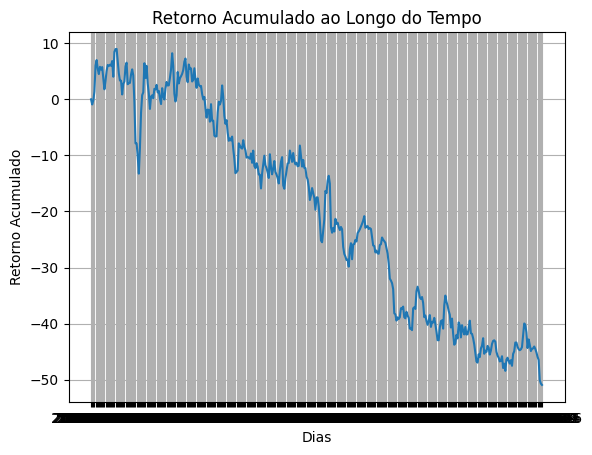

In [309]:
metricas_votacao = resultados(simulacao(apuracao.values.ravel().tolist()))

### Média das probabilidades:

Média:  -0.12672413793103443
Desvio padrão:  1.7617281478018283


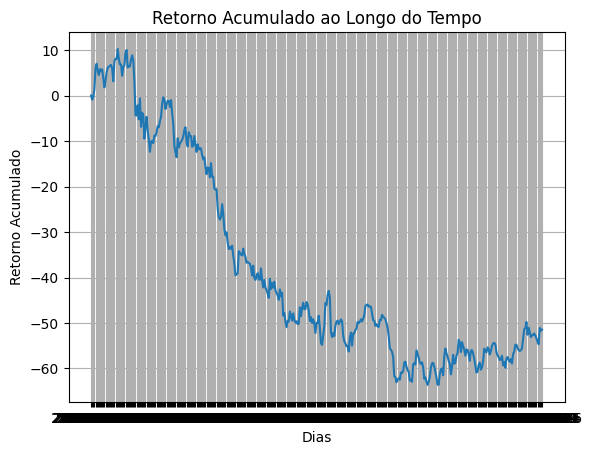

In [310]:
metricas_probabilidades = resultados(simulacao(y_media_c))

### Média ponderada pela AUC:

####Janela 1 dia:

Média:  -0.12544334975369464
Desvio padrão:  1.7618198091445667


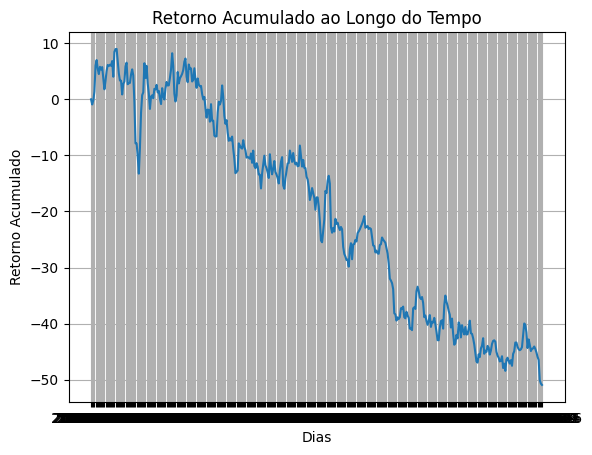

In [311]:
metricas_pond_auc1 = resultados(simulacao(y_pond_binary1))

####Janela 5 dias:

Média:  -0.12544334975369464
Desvio padrão:  1.7618198091445667


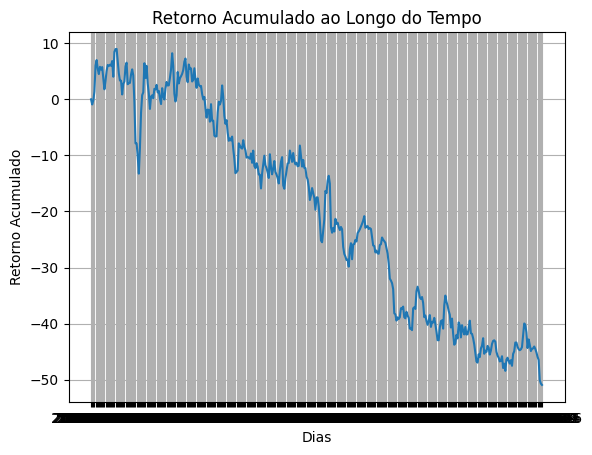

In [312]:
metricas_pond_auc5 = resultados(simulacao(y_pond_binary5))

####Janela 22 dias:

Média:  -0.12544334975369464
Desvio padrão:  1.7618198091445667


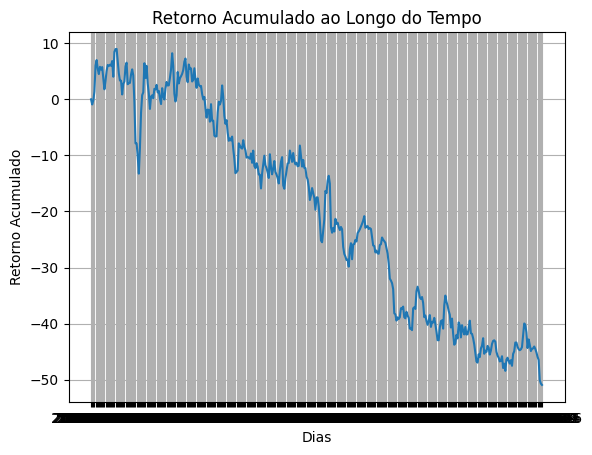

In [313]:
metricas_pond_auc22 = resultados(simulacao(y_pond_binary22))

### Stacking:

####Janela 1 dia:

Média:  0.03406403940886699
Desvio padrão:  1.7659515041786327


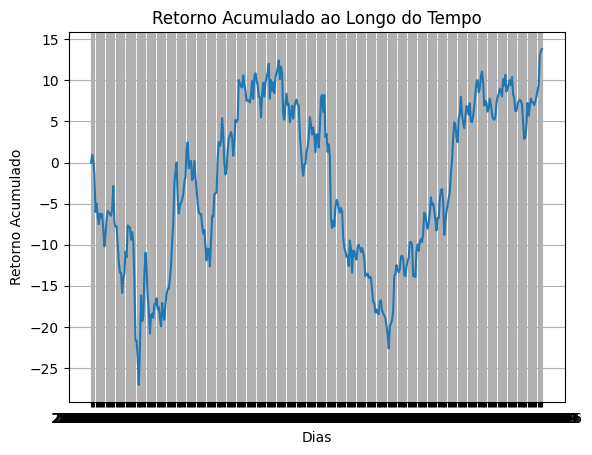

In [314]:
metricas_stacking_c1 = resultados(simulacao(stacking_predict_c1))

####Janela 5 dias:

Média:  0.014014778325122938
Desvio padrão:  1.7662244081316854


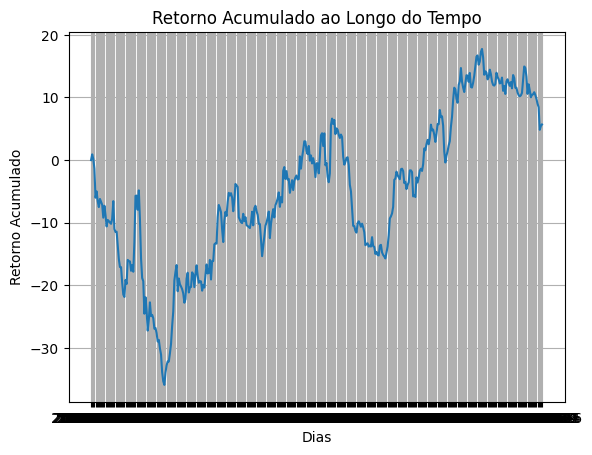

In [315]:
metricas_stacking_c5 = resultados(simulacao(stacking_predict_c5))

####Janela 22 dias:

Média:  -0.035443349753694446
Desvio padrão:  1.7659243593228624


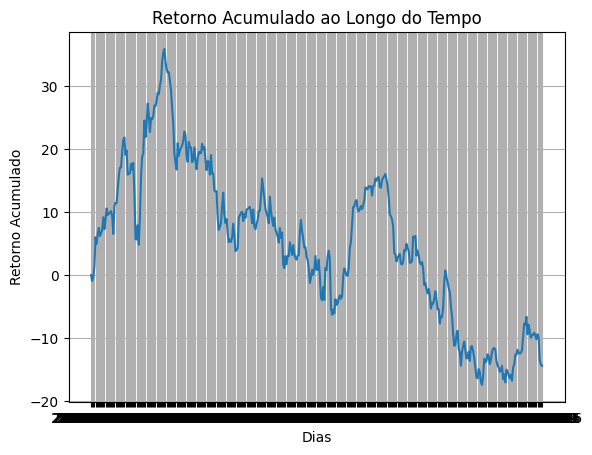

In [316]:
metricas_stacking_c22 = resultados(simulacao(stacking_predict_c22))

## Regressão:

### Média:

Média:  -0.15219211822660078
Desvio padrão:  1.7597109515603195


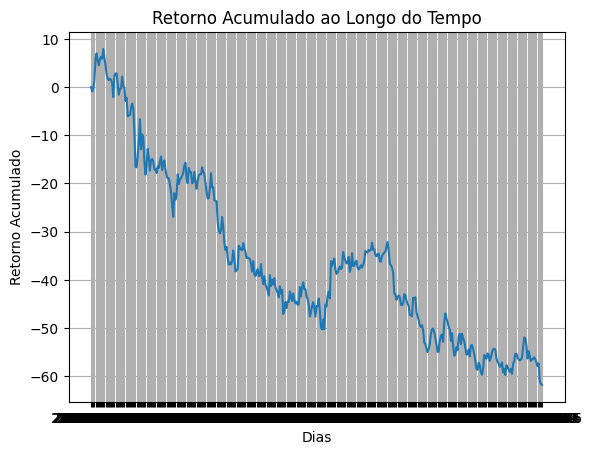

In [317]:
metricas_media_r = resultados(simulacao(media_r))

### Média ponderada pela MAE:

####Janela 1 dia:

Média:  -0.1450985221674875
Desvio padrão:  1.7603100558584661


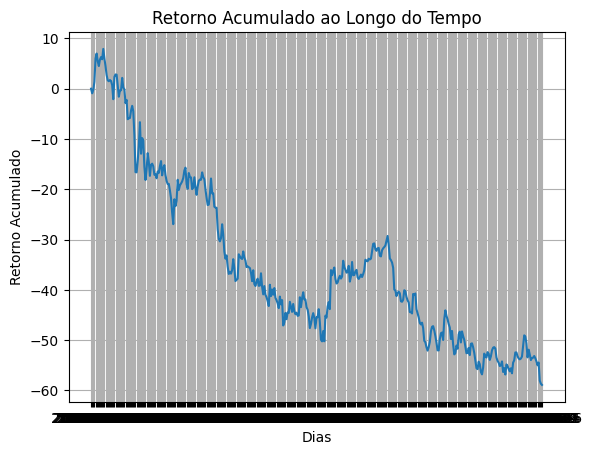

In [318]:
metricas_pond_mae1 = resultados(simulacao(y_pond1))

####Janela 5 dias:

Média:  -0.13495073891625597
Desvio padrão:  1.7611170807068963


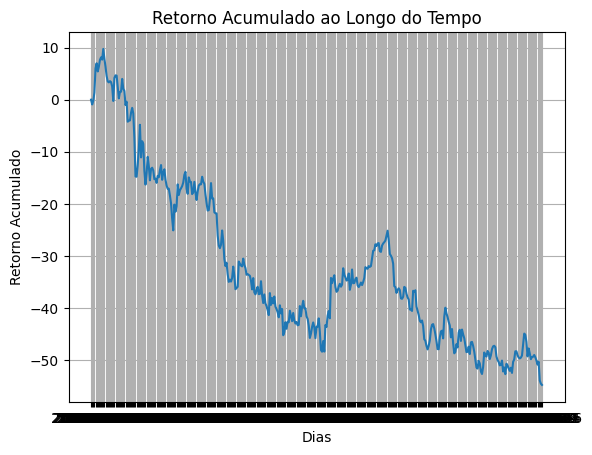

In [319]:
metricas_pond_mae5 = resultados(simulacao(y_pond5))

####Janela 22 dias:

Média:  -0.1339655172413791
Desvio padrão:  1.7611922990070887


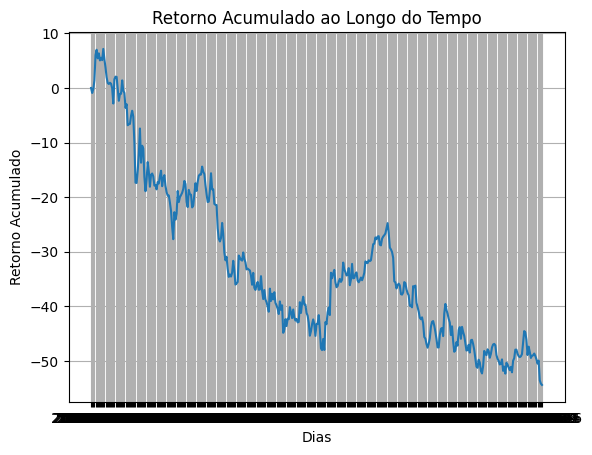

In [320]:
metricas_pond_mae22 = resultados(simulacao(y_pond22))

### Stacking:

####Janela 1 dia:

Média:  -0.011748768472906429
Desvio padrão:  1.7662409349607417


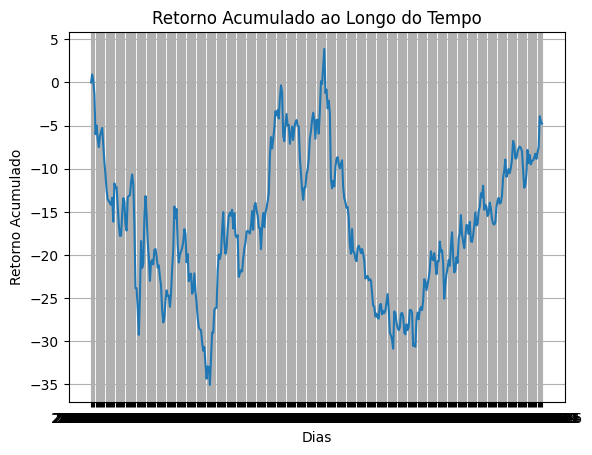

In [321]:
metricas_stacking_r1 = resultados(simulacao(stacking_predict_r1))

####Janela 5 dias:

Média:  -0.10110837438423666
Desvio padrão:  1.7633837275309652


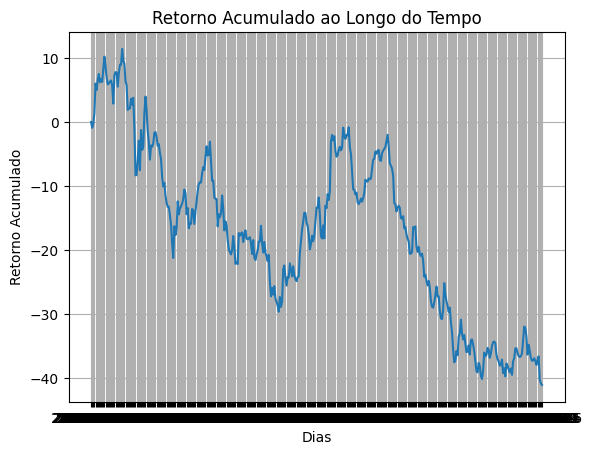

In [322]:
metricas_stacking_r5 = resultados(simulacao(stacking_predict_r5))

####Janela 22 dias:

Média:  -0.05662561576354665
Desvio padrão:  1.7653720892579627


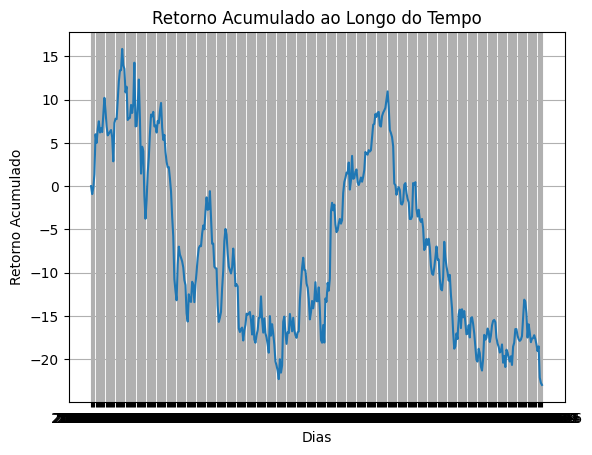

In [323]:
metricas_stacking_r22 = resultados(simulacao(stacking_predict_r22))

## Gráfico - retorno x risco:

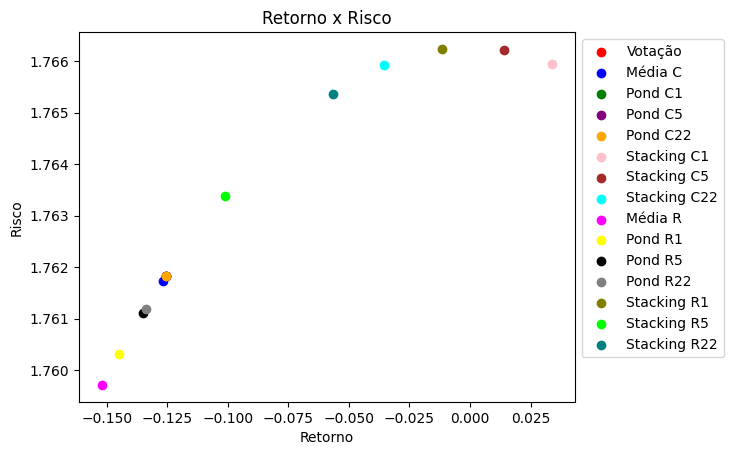

In [324]:
pontos = [metricas_votacao, metricas_probabilidades, metricas_pond_auc1, metricas_pond_auc5, metricas_pond_auc22,
          metricas_stacking_c1, metricas_stacking_c5, metricas_stacking_c22, metricas_media_r, metricas_pond_mae1,
          metricas_pond_mae5, metricas_pond_mae22, metricas_stacking_r1, metricas_stacking_r5, metricas_stacking_r22]

legendas = ['Votação', 'Média C', 'Pond C1', 'Pond C5', 'Pond C22', 'Stacking C1', 'Stacking C5', 'Stacking C22',
            'Média R', 'Pond R1', 'Pond R5', 'Pond R22', 'Stacking R1', 'Stacking R5', 'Stacking R22']

x, y = zip(*pontos)

cores = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'cyan', 'magenta', 'yellow', 'black', 'gray',
         'olive', 'lime', 'teal']

# Criar um gráfico de pontos com legendas e cores
for i in range(len(pontos)):
    x, y = pontos[i]
    plt.scatter(x, y, color=cores[i], label=legendas[i])

# Adicionar rótulos aos eixos
plt.xlabel('Retorno')
plt.ylabel('Risco')

# Adicionar um título ao gráfico
plt.title('Retorno x Risco')

# Adicionar legendas no canto
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibir o gráfico
plt.show()